# MEMO
## Derivation of local minimum of hard sphere theory
The coagulation rate coefficient of nanoclusters $i$ and $j$ in hard sphere theory is:

$$
\beta_{ij}=\bar{v}_{ij}A_{ij}
$$

where, $\bar{v}_{ij}$ is nanoclusters relative mean thermal speed and $A_{ij}$ is the nanoclustes collision cross section which is described:

$$
\bar{v}_{ij}=\sqrt{\frac{8k_{b}T}{\pi m_{ij}}}\\
A_{ij}=\frac{\pi a_{ij}^2}{4}
$$

where, $k_{b}$ is the Boltzumann constant, T is the temperature, $m_{ij}$ is the reduced mass ($\frac{1}{m_{ij}}$=$\frac{1}{m_{i}}+\frac{1}{m_{i}}$), and  $a_{ij}$  is the collision distance ($a_{ij}=\frac{D_{p,i}+D_{p,j}}{2}$). When the nanoclusters are spherical, its masses, ${m_{i}}$ and ${m_{j}}$ are described to $\rho \frac{\pi D_{p,i}^3}{6}$ and $\rho \frac{\pi D_{p,j}^3}{6}$ with the nanocluster density, $\rho$. Substituting above equaitons into first equation yields:

$$
\begin{aligned}
\beta_{ij}&=\frac{\pi\left(D_{p,i}+D_{p,j}\right)^2}{16}
    \sqrt{\frac{8k_{b}T}{\pi}\left(\frac{6}{\rho\pi D_{p,i}^3}+\frac{6}{\rho\pi D_{p,j}^3}\right)}\\
    &=\frac{\left(D_{p,i}+D_{p,j}\right)^2}{4}
    \sqrt{\frac{3k_{b}T}{\rho}\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)}
\end{aligned}
$$

The differentiation of $\beta_{ij}$ with respect to $D_{p,j}$ is:

$$
\begin{aligned}
    \frac{\partial \beta_{ij}}{\partial D_{p,j}}&=
    \frac{\left(D_{p,i}+D_{p,j}\right)}{2}
    \sqrt{\frac{3k_{b}T}{\rho}\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)} \\
    &+
    \frac{\left(D_{p,i}+D_{p,j}\right)^2}{4}
    \sqrt{\frac{3k_{b}T}{\rho}}\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)^{-1/2}
    \frac{\partial}{\partial D_{p,j}}
    \left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)\\
    &=
    \frac{\left(D_{p,i}+D_{p,j}\right)}{2}
    \sqrt{\frac{3k_{b}T}{\rho}\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)} 
    -
    \frac{3\left(D_{p,i}+D_{p,j}\right)^2}{8D_{p,j}^4}
    \sqrt{\frac{3k_{b}T}{\rho}}\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)^{-1/2}
\end{aligned}
$$

The local minimum is obtained when the derivative is equal to zero ($\frac{\partial \beta_{ij}}{\partial D_{p,j}}=0$), hence below relation is able to be yielded:

$$
    \frac{\left(D_{p,i}+D_{p,j}\right)}{2}
    \sqrt{\frac{3k_{b}T}{\rho}\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)} 
    -
    \frac{3\left(D_{p,i}+D_{p,j}\right)^2}{4D_{p,j}^4}
    \sqrt{\frac{3k_{b}T}{\rho}}\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)^{-1/2}=0\\
$$

Deviding this equation with $\frac{\left(D_{p,i}+D_{p,j}\right)}{2}\sqrt{\frac{3k_{b}T}{\rho}}$ and multiplying $\sqrt{\left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)}$ yields:

$$
    \left(\frac{1}{D_{p,i}^3}+\frac{1}{D_{p,j}^3}\right)-
    \frac{3\left(D_{p,i}+D_{p,j}\right)}{4D_{p,j}^4}=0\\
    \left(\frac{D_{p,j}^3}{D_{p,i}^3}+1\right)-
    \frac{3\left(D_{p,i}+D_{p,j}\right)}{4D_{p,j}}=0\\
    \left(\frac{D_{p,j}}{D_{p,i}}\right)^3+\frac{1}{4}-
    \frac{3D_{p,i}}{4D_{p,j}}=0
$$



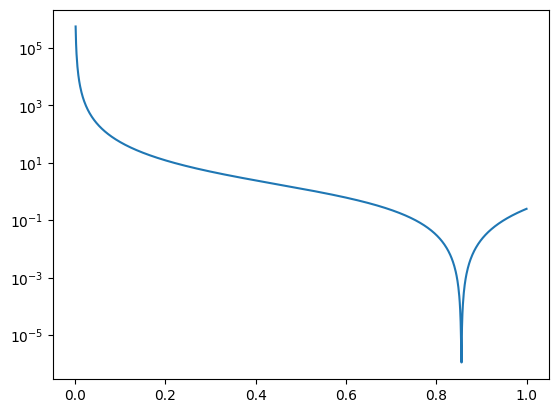

In [2]:
import numpy as np
import matplotlib.pylab as plt

dpdp=np.linspace(0.001,1,1000)
y=dpdp**3+0.25-0.75/dpdp

plt.plot(dpdp,y**2)
plt.yscale("log")
plt.show()